In [ ]:
Rou Zhang 7050809338

In [23]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import os
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
path='/Users/zhangrou/Desktop/courses/INF552/HW5/transfusion.data.csv'
f=pd.read_csv(path)
#train_df, test_df = train_test_split(f, test_size=472)
from sklearn import preprocessing 
norm_data=pd.DataFrame()
for i in range(4):
    min_max_scaler = preprocessing.MinMaxScaler() 
    data=pd.DataFrame(min_max_scaler.fit_transform(f.iloc[:,i].reshape(-1,1)))  
    norm_data=pd.concat([norm_data,data],axis=1)  
norm_data=pd.concat([norm_data,f.iloc[:,4]],axis=1)
norm_data.columns=f.columns

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [39]:
### split train test
neg=norm_data[norm_data['whether he/she donated blood in March 2007']==0]
print neg.shape
pos=norm_data[norm_data['whether he/she donated blood in March 2007']==1]
print pos.shape
train_pos, test_pos = train_test_split(pos, test_size=0.2)
train_neg, test_neg = train_test_split(neg, test_size=0.2)
print train_pos.shape, test_pos.shape
print train_neg.shape,test_neg.shape
train=train_pos.append(train_neg)
train=train.sample(frac = 1)
print train.shape
test=test_pos.append(test_neg)
test=test.sample(frac = 1)
print test.shape

(570, 5)
(178, 5)
(142, 5) (36, 5)
(456, 5) (114, 5)
(598, 5)
(150, 5)


In [40]:
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
import numpy as np 
from sklearn.svm import SVC
from sklearn import metrics
parameters={'C':[0.01,0.1,1,10]}
svc = LinearSVC(penalty='l1',dual=False)
clf = GridSearchCV(svc, parameters,cv=5)
clf.fit(train.iloc[:,:4],train.iloc[:,4])
params=clf.best_params_ 
best_c=params['C']
best_svc = LinearSVC(penalty='l1',dual=False,C=best_c)
best_svc.fit(train.iloc[:,:4],train.iloc[:,4])
train_pred=best_svc.predict(train.iloc[:,:4])
test_pred=best_svc.predict(test.iloc[:,:4])
train_confusion_matrix = confusion_matrix(train.iloc[:,4], train_pred)
test_confusion_matrix = confusion_matrix(test.iloc[:,4], test_pred)
train_accuracy=clf.score(train.iloc[:,:4],train.iloc[:,4])
test_accuracy=clf.score(test.iloc[:,:4],test.iloc[:,4])
print 'result on training data'
print train_confusion_matrix
print train_accuracy


print 'result on test data'
print test_confusion_matrix
print test_accuracy


result on training data
[[450   6]
 [129  13]]
0.774247491638796
result on test data
[[113   1]
 [ 34   2]]
0.7666666666666667


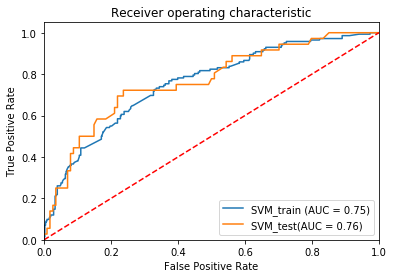

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

#train_roc_auc = roc_auc_score(train.iloc[:,4], clf.predict(train.iloc[:,:4]))
#test_roc_auc = roc_auc_score(test.iloc[:,4], clf.predict(test.iloc[:,:4]))
train_fpr, train_tpr, train_thresholds = roc_curve(train.iloc[:,4], clf.decision_function(train.iloc[:,:4]))
train_roc_auc = auc(train_fpr, train_tpr)

test_fpr, test_tpr, test_thresholds = roc_curve(test.iloc[:,4], clf.decision_function(test.iloc[:,:4]))
test_roc_auc = auc(test_fpr, test_tpr)

plt.figure()
plt.plot(train_fpr, train_tpr, label='SVM_train (AUC = %0.2f)' % train_roc_auc)
plt.plot(test_fpr, test_tpr, label='SVM_test(AUC = %0.2f)' % test_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

1..(b) Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the accuracy, AUC, ROC, and confusion matrix for both training and test sets.


In this step, I firstly normalize the data set and then use GridSearchCV to find out the best penalty parameter.
Secondly, I use the best penalty parameter we got in last step to train our model LinesrSVC( LinearSVC(penalty='l1',dual=False) and calculate accuracy ,confusion_matrix, plot AUC curve  on training set and test set.

The result on training data is below:

confusion_matrix:

[[450   6]


 [129  13]]

accuracy:

0.774247491638796

The result on test data is below:

confusion_matrix:

[[113   1]


 [ 34   2]]
 
accuracy:

0.7666666666666667



ROC curve is above. AUC_train is 0.75, AUC_test is 0.76




In [41]:
#train_neg, test_neg = train_test_split(neg, test_size=0.2)
print train.shape
train_pos=train[train['whether he/she donated blood in March 2007']==1]
train_neg=train[train['whether he/she donated blood in March 2007']==0]
print train_pos.shape,train_neg.shape
label_pos, unlabel_pos = train_test_split(train_pos, test_size=0.5)
label_neg, unlabel_neg = train_test_split(train_neg, test_size=0.5)
print label_pos.shape,unlabel_pos.shape,label_neg.shape, unlabel_neg.shape

(598, 5)
(142, 5) (456, 5)
(71, 5) (71, 5) (228, 5) (228, 5)


In [42]:
label_data=label_pos.append(label_neg)
label_data=label_data.sample(frac = 1)
unlabel_data=unlabel_pos.append(unlabel_neg)
unlabel_data=unlabel_data.sample(frac = 1)
print label_data.shape, unlabel_data.shape

(299, 5) (299, 5)


In [43]:
parameters={'C':[0.01,0.1,1,10]}
svc = LinearSVC(penalty='l1',dual=False)
clf = GridSearchCV(svc, parameters,cv=5)
clf.fit(label_data.iloc[:,:4],label_data.iloc[:,4])
params=clf.best_params_ 
best_c=params['C']
best_svc = LinearSVC(penalty='l1',dual=False,C=best_c)
best_svc.fit(label_data.iloc[:,:4],label_data.iloc[:,4])
y_pred=best_svc.predict(label_data.iloc[:,:4])
accuracy=clf.score(label_data.iloc[:,:4],label_data.iloc[:,4])
print accuracy

0.7892976588628763


1..c) i: Train an L1-penalized SVM to classify the labeled data. Choose the penalty parameter using 5 fold cross validation.


In this step, I firstlt select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. 
Secondly, I used GridSearchCV(svc, parameters,cv=5) to find the best C and use it to train our model. Then test it on the labled data, The accuracy is 0.7892976588628763

In [44]:
y_pred=list()
svc= LinearSVC(penalty='l1',dual=False)
for i in range(len(unlabel_data)):
    #print i
    svc.fit(label_data.iloc[:,:4],label_data.iloc[:,4])
    distance=pd.DataFrame(abs(svc.decision_function(unlabel_data.iloc[:,:4])))
    #print distance[:1]
    distance.columns=['distance']
    distance.index=unlabel_data.index
    unlabel_data=pd.concat([unlabel_data.iloc[:,:4],distance],axis=1)
    unlabel_data=unlabel_data.sort_values(by="distance",axis=0,ascending = False)
    new=unlabel_data.iloc[:1,:4]
    #print new
    index=new.index
    #print new
    label=svc.predict(new.iloc[:1,:4])
    new['whether he/she donated blood in March 2007']=label
    y_pred.append(label)
    #print new
    label_data=pd.concat([label_data,new],axis=0)
    unlabel_data.drop('distance',axis=1,inplace=True)
    unlabel_data.drop(index,axis=0,inplace=True)
    y_pred.append(svc.predict(new.iloc[:,:4]))


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
svc.fit(test.iloc[:,:4],test.iloc[:,4])
y_pred=svc.predict(test.iloc[:,:4])
confusion_matrix = confusion_matrix(test.iloc[:,4], y_pred)
accuracy=svc.score(test.iloc[:,:4],test.iloc[:,4])
print(confusion_matrix)
print accuracy

[[113   1]
 [ 33   3]]
0.7733333333333333


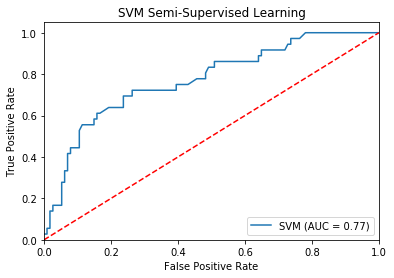

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(test.iloc[:,4], svc.predict(test.iloc[:,:4]))
fpr, tpr, thresholds = roc_curve(test.iloc[:,4], svc.decision_function(test.iloc[:,:4]))
logit_roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='SVM (AUC = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Semi-Supervised Learning')
plt.legend(loc="lower right")
plt.show()

1.. c)ii. Find the unlabeled data point that is the closest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and report the accuracy, AUC, ROC, and confusion matrix for the test set.


In this step, we used a loop to add the unlabel data to label data pool. For each time, we used decision_function() to calculate the distacne between points in unlabel dataset and SVM boundary. And  choose  the point corresponding to the greatest  distance and use predict() function to label it and add it to the label dataset.

Finally ,we tested the final SVM on the test data .

confusion matrix:

[[113   1]


 [ 33   3]]
 
accuracy:

0.7733333333333333


ROC  curve is above and AUC is 0.77

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(train.iloc[:,:4])
#print kmeans.labels_
print kmeans.cluster_centers_

[[0.13796861 0.18839149 0.18839149 0.64740143]
 [0.12772238 0.0459679  0.0459679  0.19255663]]


1.. d)i. Run the k-means algorithm multiple times. How do you make sure that the algorithm was not trapped in a local minimum?

K-means each time tries to find a local minimum colution. In order to avoid local minimum , we often need to run it multiple or even hundreds of times. With repeat times increasing, it will finally take postition of center of gravity which has the minimm cost function as initialization postition. So that we can avoid our algorithm being trapped in a local minimum.


In [5]:
class_one=kmeans.cluster_centers_[0]
class_two=kmeans.cluster_centers_[1]
distance_one=list()
distance_two=list()
for i in range(len(train)):
    a=train.iloc[i,:4]
    distance_one.append(np.linalg.norm(a-class_one))
    distance_two.append(np.linalg.norm(a-class_two))
    
    
    
    

In [6]:
distance_one=pd.DataFrame(distance_one)
distance_two=pd.DataFrame(distance_two)

In [8]:
y=train.iloc[:,4].reset_index(drop=True) 
distance_one['label']=y
distance_two['label']=y

In [14]:
distance_one=distance_one.sort_values(by=0,axis=0,ascending = True)
distance_two=distance_two.sort_values(by=0,axis=0,ascending = True)
temp_one=distance_one[:30]
temp_two=distance_two[:30]

if(len(temp_one[temp_one['label']==1])-len(temp_one[temp_one['label']==0])>0):
    label_one=1
else:
    lable_one=0
if(len(temp_two[temp_two['label']==1])-len(temp_two[temp_two['label']==0])>0):
    label_two=1
else:
    lable_two=0
    
    

In [15]:
print lable_one,lable_two

0 0


In [21]:
accuracy=len(distance_one[distance_one['label']==0])/598.0
print accuracy

0.76254180602


In [22]:
y_pred=list()
for i in range(598):
    y_pred.append(0)
y_pred=pd.DataFrame(y_pred)
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(distance_one['label'], y_pred)
print confusion_matrix

[[456   0]
 [142   0]]


1..d)ii. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k- means with the true labels of the training data and report accuracy and the confusion matrix.

In this step, We firstly used KMeans() function to find two cluster centers of data set and then calculated the Euclidean distance between each point and each center. Then label it to the  closest cluster.  
Secondly, we used majority polling to prediect the lable of the cluster centers. Both predictive value is 0.

Finally, we calculated the accuracy and confusion_matrix

The accuracy is : 0.76254180602

The confusion matrix is :

[[456   0]

 [142   0]]

In [43]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(test.iloc[:,:4])
#print kmeans.labels_
print kmeans.cluster_centers_

[[0.11789851 0.04935444 0.04935444 0.18579932]
 [0.12032225 0.19427002 0.19427002 0.64563301]]


In [55]:
class_one=kmeans.cluster_centers_[0]
class_two=kmeans.cluster_centers_[1]
y_pred=list()
for i in range (len(test)):
    a=test.iloc[i,:4]
    distance_one=np.linalg.norm(a-class_one)
    distance_two=np.linalg.norm(a-class_two)
    if distance_one>distance_two:
        y_pred.append(1)
    else:
        y_pred.append(0)
    
    

In [57]:
accuracy=len(test[test['whether he/she donated blood in March 2007']==0])/150.0
print accuracy

0.76


1.. d)iii. Classify test data based on their proximity to the centers of the clusters. Report accuracy and confusion matrix for the test data.

In this step, we used the model we trained last step and predict function to predict lable of the test data and calculated accuracy is 0.76.

1..(f) One expects that supervised learning on the full data set works better than semi- supervised learning with half of the data set labeled.One expects that unsuper-vised learning underperforms in such situations. Compare the results you obtained by those methods.

In this problem, 
supervise learning accuracy is 0.7666666666666667
semi-supervised learning accuracy is 0.7733333333333333
unsupervised learning accuracy is 0.76


so in this problem, semi-supervised learning does best, supervise learning is second and unsupervised learning is worst.

In [3]:
path='/Users/zhangrou/Desktop/courses/INF552/HW4/Frogs_MFCCs.csv'
f=pd.read_csv(path)

In [4]:
x=f.iloc[:,:22]
y=f.iloc[22:25]

In [5]:
max_score=0
from sklearn.cluster import KMeans
for k in range(2,30,2):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(x)
    labels = kmeans_model.labels_
    score=metrics.calinski_harabaz_score(x, labels) 
    print score
    if score>max_score:
        max_score=score
        best_k=k
print best_k 
        
    


3680.7413494630937
2756.474989440641
2390.2350026691993
2128.4862066060823
1941.0604599066778
1838.723382335969
1733.9481260742946
1629.5500705792053
1536.0462271047982
1484.4402266196075
1411.5633979629106
1358.2370426323841
1309.831281218567
1247.771290644714
2


2.. (a) Use k-means clustering on Anuran Calls (MFCCs) Data Set of Homework 4. Choose k automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots) or any other method you know.


In this step , I used a loop to find the best K , and when K=2, we got the highest CH.  So the best k is 2

In [6]:
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(x)
print kmeans_model.cluster_centers_

[[ 9.97854689e-01  2.78599755e-01  2.10976333e-01  5.53219293e-01
   1.91576411e-01  2.89076622e-02 -1.15212266e-01  4.46576491e-02
   2.59658250e-01  3.53446490e-02 -2.64243211e-01  9.58212540e-02
   3.16042053e-01 -1.11730412e-01 -2.49249941e-01  9.01269969e-02
   1.96107651e-01  1.09029904e-02 -9.84714482e-02 -1.18622932e-01
   5.84147698e-02  1.87557610e-01]
 [ 9.81912190e-01  3.68580302e-01  4.11499956e-01  3.38745161e-01
   6.24981505e-02  1.66989514e-01  1.12450307e-01 -4.54103922e-02
  -3.26806081e-03  7.66570254e-02  3.29197462e-02 -9.09333134e-03
  -1.41984527e-02  3.32633353e-02  4.57955472e-02 -6.01663237e-03
  -1.87769057e-02  4.60654835e-03 -4.62719786e-04  1.21530071e-02
   1.62062920e-02 -1.24504200e-02]]


In [7]:
label=kmeans_model.predict(x)

In [9]:
f['label']=label

In [10]:
label_one=f[f['label']==0]
label_two=f[f['label']==1]

In [11]:
print 

.value_counts()
print label_one['Genus'].value_counts()
print label_one['Species'].value_counts()

Leptodactylidae    3474
Hylidae             124
Name: Family, dtype: int64
Adenomera        3470
Dendropsophus     108
Hypsiboas          14
Leptodactylus       4
Scinax              2
Name: Genus, dtype: int64
AdenomeraHylaedactylus    3470
HylaMinuta                 108
HypsiboasCordobae           14
LeptodactylusFuscus          4
ScinaxRuber                  2
Name: Species, dtype: int64


In [12]:
print label_two['Family'].value_counts()
print label_two['Genus'].value_counts()
print label_two['Species'].value_counts()

Hylidae            2041
Leptodactylidae     946
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64
Hypsiboas        1579
Adenomera         680
Ameerega          542
Leptodactylus     266
Dendropsophus     202
Scinax            146
Osteocephalus     114
Rhinella           68
Name: Genus, dtype: int64
HypsiboasCordobae         1107
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
LeptodactylusFuscus        266
HylaMinuta                 202
ScinaxRuber                146
OsteocephalusOophagus      114
Rhinellagranulosa           68
AdenomeraHylaedactylus       8
Name: Species, dtype: int64



2..(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In this step , I firstly used the Kmeans to find two cluster centers and then used predict() function to look which cluster each point belongs to.
Secondly, I used value_counts() to find which family，genus, species is the majority.

And the result is 

cluster_one:  (Leptodactylidae ,Adenomera , AdenomeraHylaedactylus)

cluster_two: (Hylidae   ,Hypsiboas   ,  HypsiboasCordobae)

In [16]:
print f.shape

(7195, 27)


In [18]:
family_hamm=(len(label_one[label_one['Family']=='Leptodactylidae'])+len(label_two[label_two['Family']=='Hylidae']))/7195.0
genus_hamm=(len(label_one[label_one['Genus']=='Adenomera'])+len(label_two[label_two['Genus']=='Hypsiboas']))/7195.0
species_hamm=(len(label_one[label_one['Species']=='AdenomeraHylaedactylus'])+len(label_two[label_two['Species']=='HypsiboasCordobae']))/7195.0

hamming_distance=1-(family_hamm+genus_hamm+species_hamm)/3.0
print hamming_distance

0.298540653231


2..(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance between the true labels and the labels assigned by clusters.

The average hamming_distance of these three labels is 0.298540653231

3. ISLR 10.7.2

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X=[[0, 0.3, 0.4, 0.7], 
   [0.3, 0, 0.5, 0.8],
   [0.4, 0.5, 0.0, 0.45],
   [0.7, 0.8, 0.45, 0.0]]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


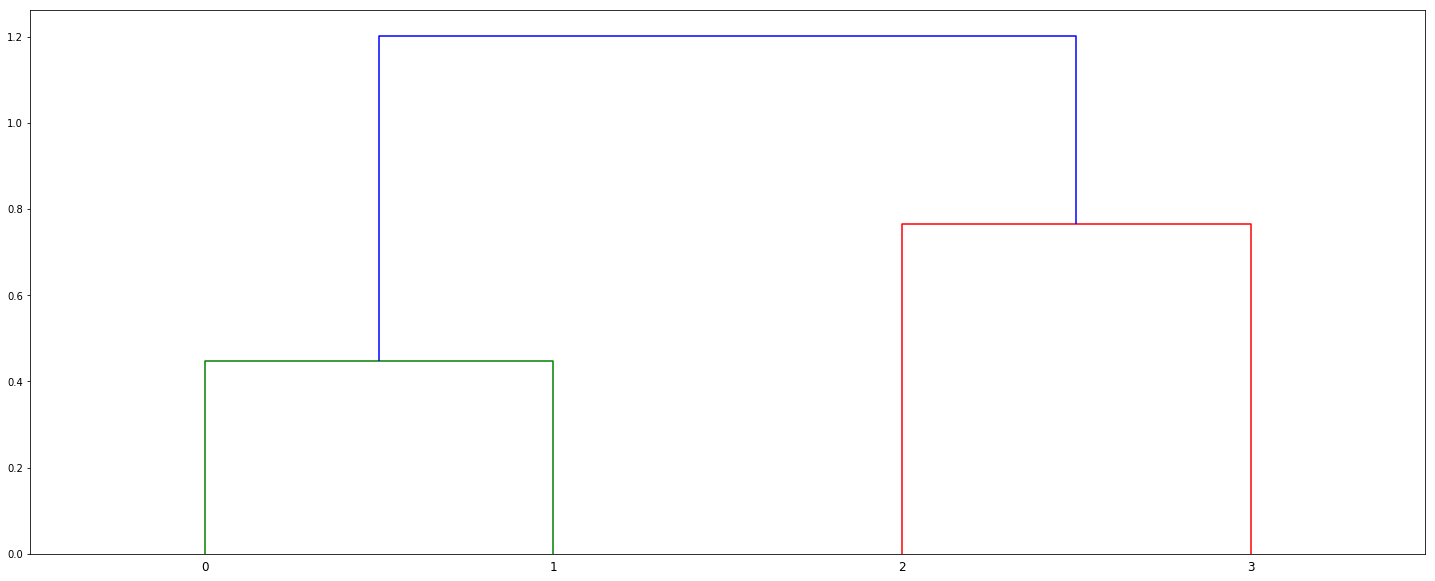

In [58]:

Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


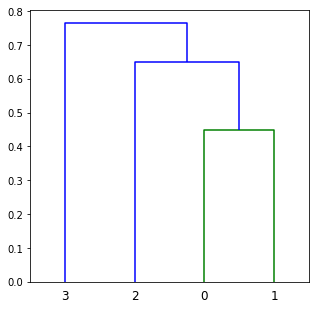

In [57]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(5, 5))
dn = dendrogram(Z)

In [ ]:
c:  The two clusters are (0,1), (2,3)


In [ ]:
d: The two clusters are ( (0, 1,) 2), (3)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


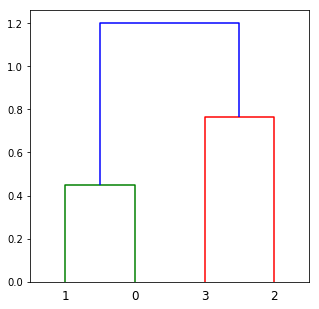

In [60]:
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(5, 5))
dn = dendrogram(Z,labels=[1,0,3,2])